<a href="https://colab.research.google.com/github/brodyanderson/math-6880-Project3/blob/main/project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Math 5750/6880: Mathematics of Data Science \
Project 3

# 1. Fashion-MNIST image classification using sklearn

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler

# Load Fashion-MNIST
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(len(X_train), -1)
X_test  = X_test.reshape(len(X_test), -1)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# your code here

In [ ]:
# Simple Model
import time

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, random_state=1)

start_time = time.time()
mlp.fit(X_train, y_train)
training_time = time.time() - start_time

y_pred = mlp.predict(X_test)


print(f"Training Time: {training_time:.2f} seconds")
print()

print(f"Training Accuracy: {accuracy_score(y_train, mlp.predict(X_train)):4f}")
print()

print(f"Test Accuracy: {accuracy_score(y_test, y_pred):4f}")
print()

print("Classification Report:")
print(classification_report(y_test, y_pred))
print()

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Training Time: 231.58 seconds

 Training Accuracy: 0.996467

 Test Accuracy: 0.876900


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1000
           1       0.98      0.97      0.98      1000
           2       0.74      0.82      0.78      1000
           3       0.90      0.85      0.88      1000
           4       0.79      0.80      0.79      1000
           5       0.97      0.96      0.96      1000
           6       0.72      0.65      0.68      1000
           7       0.94      0.96      0.95      1000
           8       0.96      0.97      0.96      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000


Confusion Matrix:
[[832   2  21  18   7   2 111   0   7   0]
 [  6 973   5   9   2   0   4   0   1   0]
 [ 22   1 820   9  82   2

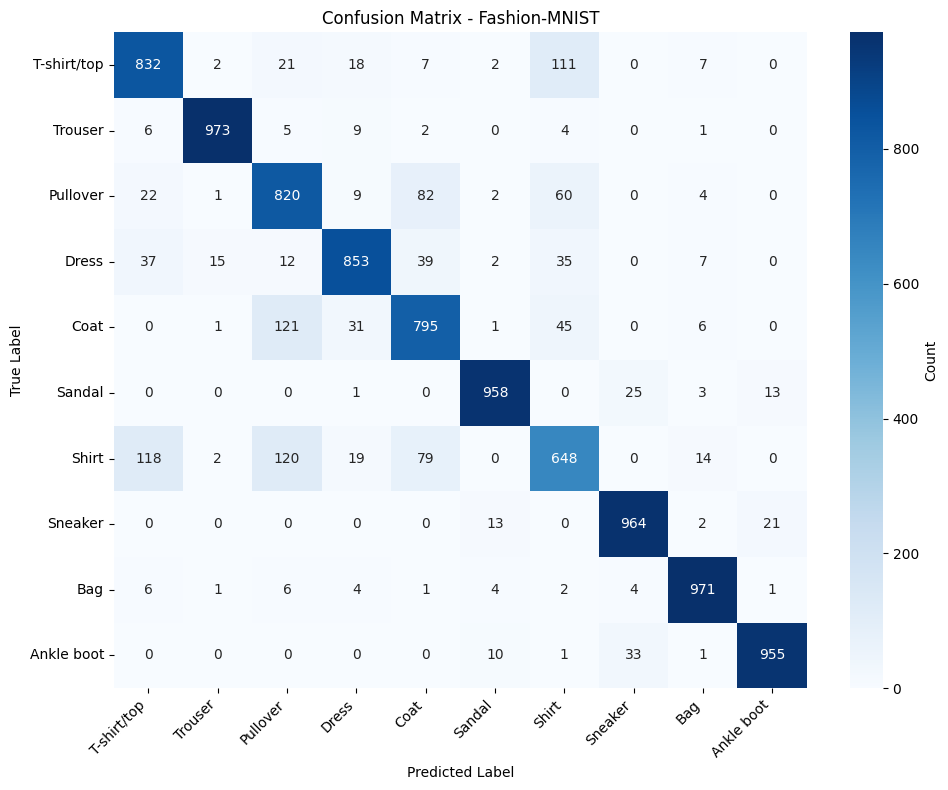

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Fashion-MNIST')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Sample
import numpy as np
import random

np.random.seed(1)
random.seed(1)

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print("Class counts:")
for i in range(len(classes)):
  print(f"{classes[i]}: {np.sum(y_train == i)}")

X_train_sample = []
y_train_sample = []

for i in range(len(classes)):
    class_mask = y_train == i
    class_indices = np.where(class_mask)[0]
    random_sample = np.random.choice(class_indices, 1000, replace=False)

    X_train_sample.extend(X_train[random_sample])
    y_train_sample.extend(y_train[random_sample])

X_train_sample = np.array(X_train_sample)
y_train_sample = np.array(y_train_sample)

print()
print("Sample class counts:")
for i in range(len(classes)):
  print(f"{classes[i]}: {np.sum(y_train_sample == i)}")

print()
print("Sampled data shape:", X_train_sample.shape)
print("Sampled labels shape:", y_train_sample.shape)

Class counts:
T-shirt/top: 6000
Trouser: 6000
Pullover: 6000
Dress: 6000
Coat: 6000
Sandal: 6000
Shirt: 6000
Sneaker: 6000
Bag: 6000
Ankle boot: 6000

Sample class counts:
T-shirt/top: 1000
Trouser: 1000
Pullover: 1000
Dress: 1000
Coat: 1000
Sandal: 1000
Shirt: 1000
Sneaker: 1000
Bag: 1000
Ankle boot: 1000

Sampled data shape: (10000, 784)
Sampled labels shape: (10000,)


In [ ]:
# NUMBER OF HIDDEN LAYERS & NEURONS
import time

layers_and_neurons = [
    (512),
    (512, 256),
    (400, 200, 100),
    (256, 128, 64),
    (512, 256, 128),
    (512, 256, 128, 64)
]

for i in range(len(layers_and_neurons)):
  mlp = MLPClassifier(hidden_layer_sizes=layers_and_neurons[i], max_iter=200, random_state=1)

  start_time = time.time()
  mlp.fit(X_train_sample, y_train_sample)
  training_time = time.time() - start_time
  y_pred = mlp.predict(X_test)

  print(f"Hidden Layers & Nuerons: {layers_and_neurons[i]}")
  print(f"Iterations to Converge: {mlp.n_iter_}")
  print(f"Final Loss: {mlp.loss_curve_[-1]:.4f}")
  print(f"Training Time: {training_time:.2f} seconds")
  print(f"Training Accuracy: {accuracy_score(y_train_sample, mlp.predict(X_train_sample)):4f}")
  print(f"Test Accuracy: {accuracy_score(y_test, y_pred):4f}")
  print()


Hidden Layers & Nuerons: 512
Iterations to Converge: 49
Final Loss: 0.0084
Training Time: 67.04 seconds
Training Accuracy: 0.999600
Test Accuracy: 0.858400

Hidden Layers & Nuerons: (512, 256)
Iterations to Converge: 42
Final Loss: 0.0950
Training Time: 83.50 seconds
Training Accuracy: 0.966200
Test Accuracy: 0.845800

Hidden Layers & Nuerons: (400, 200, 100)
Iterations to Converge: 43
Final Loss: 0.0314
Training Time: 69.55 seconds
Training Accuracy: 0.986600
Test Accuracy: 0.853500

Hidden Layers & Nuerons: (256, 128, 64)
Iterations to Converge: 52
Final Loss: 0.0005
Training Time: 48.67 seconds
Training Accuracy: 1.000000
Test Accuracy: 0.864600

Hidden Layers & Nuerons: (512, 256, 128)
Iterations to Converge: 48
Final Loss: 0.0654
Training Time: 98.89 seconds
Training Accuracy: 0.967000
Test Accuracy: 0.838400

Hidden Layers & Nuerons: (512, 256, 128, 64)
Iterations to Converge: 42
Final Loss: 0.0332
Training Time: 87.02 seconds
Training Accuracy: 0.990100
Test Accuracy: 0.854400



In [ ]:
# Simple Model on Sampled Data
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, random_state=1)

start_time = time.time()
mlp.fit(X_train_sample, y_train_sample)
training_time = time.time() - start_time

y_pred = mlp.predict(X_test)

print(f"Training Time: {training_time:.2f} seconds")
print()

print(f"Training Accuracy: {accuracy_score(y_train_sample, mlp.predict(X_train_sample)):4f}")
print()

print(f"Test Accuracy: {accuracy_score(y_test, y_pred):4f}")
print()

print("Classification Report:")
print(classification_report(y_test, y_pred))
print()

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Training Time: 35.26 seconds

Training Accuracy: 1.000000

Test Accuracy: 0.855000

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1000
           1       0.97      0.95      0.96      1000
           2       0.76      0.79      0.77      1000
           3       0.86      0.85      0.86      1000
           4       0.78      0.76      0.77      1000
           5       0.94      0.92      0.93      1000
           6       0.66      0.65      0.65      1000
           7       0.91      0.93      0.92      1000
           8       0.95      0.94      0.95      1000
           9       0.92      0.94      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.85      0.85     10000


Confusion Matrix:
[[818   1  18  28   3   1 122   0   8   1]
 [  5 954   5  22   8   0   4   0   2   0]
 [ 14   3 785  16 100   4  74

In [ ]:
# NUMBER OF HIDDEN LAYERS & NEURONS
layers_and_neurons = [
    (50,),
    (100,),
    (200,),
    (50, 50),
    (100, 50),
    (200, 100),
    (50, 50, 50),
    (200, 100, 50)
]

for i in range(len(layers_and_neurons)):
  mlp = MLPClassifier(hidden_layer_sizes=layers_and_neurons[i], max_iter=200, random_state=1)

  start_time = time.time()
  mlp.fit(X_train_sample, y_train_sample)
  training_time = time.time() - start_time
  y_pred = mlp.predict(X_test)

  print(f"Hidden Layers & Nuerons: {layers_and_neurons[i]}")
  print(f"Iterations to Converge: {mlp.n_iter_}")
  print(f"Training Time: {training_time:.2f} seconds")
  print(f"Training Accuracy: {accuracy_score(y_train_sample, mlp.predict(X_train_sample)):4f}")
  print(f"Test Accuracy: {accuracy_score(y_test, y_pred):4f}")
  print()


Hidden Layers & Nuerons: (50,)
Iterations to Converge: 145
Training Time: 34.90 seconds
Training Accuracy: 1.000000
Test Accuracy: 0.848800

Hidden Layers & Nuerons: (100,)
Iterations to Converge: 90
Training Time: 35.01 seconds
Training Accuracy: 1.000000
Test Accuracy: 0.855000

Hidden Layers & Nuerons: (200,)
Iterations to Converge: 87
Training Time: 56.66 seconds
Training Accuracy: 1.000000
Test Accuracy: 0.858800

Hidden Layers & Nuerons: (50, 50)
Iterations to Converge: 77
Training Time: 20.61 seconds
Training Accuracy: 1.000000
Test Accuracy: 0.848400

Hidden Layers & Nuerons: (100, 50)
Iterations to Converge: 71
Training Time: 33.12 seconds
Training Accuracy: 1.000000
Test Accuracy: 0.854700

Hidden Layers & Nuerons: (200, 100)
Iterations to Converge: 54
Training Time: 40.63 seconds
Training Accuracy: 1.000000
Test Accuracy: 0.864000

Hidden Layers & Nuerons: (50, 50, 50)
Iterations to Converge: 81
Training Time: 26.92 seconds
Training Accuracy: 1.000000
Test Accuracy: 0.848700

Hidden Layers & Nuerons: (50,)
Training Time: 36.82 seconds
Training Accuracy: 1.0000
Test Accuracy: 0.8488

Hidden Layers & Nuerons: (100,)
Training Time: 32.30 seconds
Training Accuracy: 1.0000
Test Accuracy: 0.8550

Hidden Layers & Nuerons: (200,)
Training Time: 53.82 seconds
Training Accuracy: 1.0000
Test Accuracy: 0.8588

Hidden Layers & Nuerons: (50, 50)
Training Time: 22.63 seconds
Training Accuracy: 1.0000
Test Accuracy: 0.8484

Hidden Layers & Nuerons: (100, 50)
Training Time: 29.18 seconds
Training Accuracy: 1.0000
Test Accuracy: 0.8547

Hidden Layers & Nuerons: (200, 100)
Training Time: 40.74 seconds
Training Accuracy: 1.0000
Test Accuracy: 0.8640

Hidden Layers & Nuerons: (50, 50, 50)
Training Time: 27.04 seconds
Training Accuracy: 1.0000
Test Accuracy: 0.8487

Hidden Layers & Nuerons: (200, 100, 50)
Training Time: 39.58 seconds
Training Accuracy: 0.9997
Test Accuracy: 0.8596



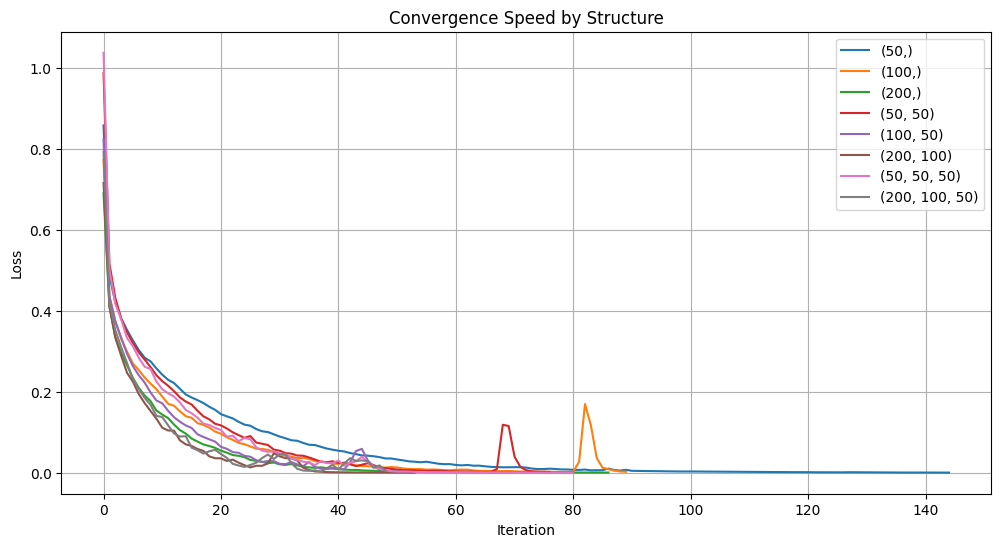

In [ ]:
# NUMBER OF HIDDEN LAYERS & NEURONS
import matplotlib.pyplot as plt

layers_and_neurons = [
    (50,),
    (100,),
    (200,),
    (50, 50),
    (100, 50),
    (200, 100),
    (50, 50, 50),
    (200, 100, 50)
]

plt.figure(figsize=(12, 6))

for i in range(len(layers_and_neurons)):
    mlp = MLPClassifier(hidden_layer_sizes=layers_and_neurons[i], max_iter=200,random_state=1)

    start_time = time.time()
    mlp.fit(X_train_sample, y_train_sample)
    training_time = time.time() - start_time
    y_pred = mlp.predict(X_test)

    train_acc = accuracy_score(y_train_sample, mlp.predict(X_train_sample))
    test_acc = accuracy_score(y_test, y_pred)

    print(f"Hidden Layers & Neurons: {layers_and_neurons[i]}")
    print(f"Training Time: {training_time:.2f} seconds")
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    print()

    # Plot convergence curve
    plt.plot(mlp.loss_curve_, label=str(layers_and_neurons[i]))

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Convergence Speed by Structure')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# ACTIVATION FUNCTIONS
activation_functions = ['relu', 'logistic', 'tanh', 'identity']
structures = [(200,), (200, 100), (200, 100, 50)]

for structure in structures:
  print(f"\n{'============================='}")
  print(f"Testing Structure (Hidden Layers & Neurons): {structure}")
  print(f"{'============================='}\n")

  for activation in activation_functions:
      mlp = MLPClassifier(hidden_layer_sizes=structure, activation=activation, max_iter=200, random_state=1)

      start_time = time.time()
      mlp.fit(X_train_sample, y_train_sample)
      training_time = time.time() - start_time
      y_pred = mlp.predict(X_test)

      train_acc = accuracy_score(y_train_sample, mlp.predict(X_train_sample))
      test_acc = accuracy_score(y_test, y_pred)

      print(f"Activation Function: {activation}")
      print(f"Training Time: {training_time:.2f} seconds")
      print(f"Training Accuracy: {train_acc:.4f}")
      print(f"Test Accuracy: {test_acc:.4f}")
      print()



Testing Structure (Hidden Layers & Neurons): (200,)

Activation Function: relu
Training Time: 56.95 seconds
Training Accuracy: 1.0000
Test Accuracy: 0.8588

Activation Function: logistic
Training Time: 89.46 seconds
Training Accuracy: 1.0000
Test Accuracy: 0.8573

Activation Function: tanh
Training Time: 65.36 seconds
Training Accuracy: 1.0000
Test Accuracy: 0.8538

Activation Function: identity
Training Time: 57.00 seconds
Training Accuracy: 0.9341
Test Accuracy: 0.7979


Testing Structure (Hidden Layers & Neurons): (200, 100)

Activation Function: relu
Training Time: 41.99 seconds
Training Accuracy: 1.0000
Test Accuracy: 0.8640

Activation Function: logistic
Training Time: 75.12 seconds
Training Accuracy: 1.0000
Test Accuracy: 0.8529

Activation Function: tanh
Training Time: 51.21 seconds
Training Accuracy: 1.0000
Test Accuracy: 0.8553

Activation Function: identity
Training Time: 45.23 seconds
Training Accuracy: 0.9246
Test Accuracy: 0.8042


Testing Structure (Hidden Layers & Neur

In [ ]:
# OPTIMIZATION METHOD & LEARNING RATE
optimization_methods = [
    ('adam', {}),  # Adam without a momentum parameter (doesn't use one)
    ('sgd', {'momentum': 0}),      # SGD without momentum (momentum = 0)
    ('sgd', {'momentum': 0.5}),    # SGD with momentum=0.5
    ('sgd', {'momentum': 0.9}),    # SGD with momentum=0.9
    ('sgd', {'momentum': 0.99}),   # SGD with momentum=0.99
]

learning_rates = [0.001, 0.01, 0.1]
structure = (200, 100)

for opt_method, config in optimization_methods:
    momentum = config.get('momentum', 'N/A')
    print(f"\n{'============================='}")
    print(f"Testing Solver: {opt_method}, Momentum: {momentum}")
    print(f"{'============================='}\n")
    for lr in learning_rates:
        mlp_params = {
            'hidden_layer_sizes': structure,
            'solver': opt_method,
            'learning_rate_init': lr,
            'max_iter': 200,
            'random_state': 1
        }

        # Add momentum only for SGD
        if 'momentum' in config:
            mlp_params['momentum'] = config['momentum']

        mlp = MLPClassifier(**mlp_params)
        start_time = time.time()
        mlp.fit(X_train_sample, y_train_sample)
        training_time = time.time() - start_time
        y_pred = mlp.predict(X_test)

        train_acc = accuracy_score(y_train_sample, mlp.predict(X_train_sample))
        test_acc = accuracy_score(y_test, y_pred)

        print(f"  Learning Rate: {lr}")
        print(f"  Training Time: {training_time:.2f} seconds")
        print(f"  Training Accuracy: {train_acc:.4f}")
        print(f"  Test Accuracy: {test_acc:.4f}")
        print()


Testing Solver: adam, Momentum: N/A

  Learning Rate: 0.001
  Training Time: 47.25 seconds
  Training Accuracy: 1.0000
  Test Accuracy: 0.8640

  Learning Rate: 0.01
  Training Time: 33.23 seconds
  Training Accuracy: 0.9487
  Test Accuracy: 0.8367

  Learning Rate: 0.1
  Training Time: 11.01 seconds
  Training Accuracy: 0.1000
  Test Accuracy: 0.1000


Testing Solver: sgd, Momentum: 0



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


  Learning Rate: 0.001
  Training Time: 149.00 seconds
  Training Accuracy: 0.8712
  Test Accuracy: 0.8305



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


  Learning Rate: 0.01
  Training Time: 141.30 seconds
  Training Accuracy: 0.9917
  Test Accuracy: 0.8537

  Learning Rate: 0.1
  Training Time: 69.51 seconds
  Training Accuracy: 1.0000
  Test Accuracy: 0.8560


Testing Solver: sgd, Momentum: 0.5



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


  Learning Rate: 0.001
  Training Time: 146.44 seconds
  Training Accuracy: 0.9027
  Test Accuracy: 0.8453



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


  Learning Rate: 0.01
  Training Time: 140.34 seconds
  Training Accuracy: 1.0000
  Test Accuracy: 0.8541

  Learning Rate: 0.1
  Training Time: 45.59 seconds
  Training Accuracy: 1.0000
  Test Accuracy: 0.8587


Testing Solver: sgd, Momentum: 0.9



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


  Learning Rate: 0.001
  Training Time: 149.55 seconds
  Training Accuracy: 0.9916
  Test Accuracy: 0.8537

  Learning Rate: 0.01
  Training Time: 64.81 seconds
  Training Accuracy: 1.0000
  Test Accuracy: 0.8531

  Learning Rate: 0.1
  Training Time: 47.48 seconds
  Training Accuracy: 1.0000
  Test Accuracy: 0.8598


Testing Solver: sgd, Momentum: 0.99

  Learning Rate: 0.001
  Training Time: 76.47 seconds
  Training Accuracy: 1.0000
  Test Accuracy: 0.8548

  Learning Rate: 0.01
  Training Time: 44.89 seconds
  Training Accuracy: 0.9922
  Test Accuracy: 0.8461

  Learning Rate: 0.1
  Training Time: 9.02 seconds
  Training Accuracy: 0.1000
  Test Accuracy: 0.1000



In [ ]:
# EARLY STOPPING SETTINGS
configurations = [
    {'early_stopping': False},
    {'early_stopping': True, 'n_iter_no_change': 5},
    {'early_stopping': True, 'n_iter_no_change': 10},
    {'early_stopping': True, 'n_iter_no_change': 20},
]

structure = (200, 100)

for config in configurations:
    print(f"\n{'============================='}")
    print(f"Testing Early Stopping: {config}")
    print(f"{'============================='}\n")

    mlp = MLPClassifier(
        hidden_layer_sizes=structure,
        max_iter=200,
        random_state=1,
        **config
    )

    start_time = time.time()
    mlp.fit(X_train_sample, y_train_sample)
    training_time = time.time() - start_time
    y_pred = mlp.predict(X_test)

    train_acc = accuracy_score(y_train_sample, mlp.predict(X_train_sample))
    test_acc = accuracy_score(y_test, y_pred)

    print(f"  Iterations: {mlp.n_iter_}")
    print(f"  Training Time: {training_time:.2f} seconds")
    print(f"  Training Accuracy: {train_acc:.4f}")
    print(f"  Test Accuracy: {test_acc:.4f}")
    print(f"  Final Loss: {mlp.loss_curve_[-1]:.4f}")
    if config['early_stopping']:
        print(f"  Best Validation Score: {mlp.best_validation_score_:.4f}")
    print()


Testing Early Stopping: {'early_stopping': False}

  Iterations: 54
  Training Time: 44.66 seconds
  Training Accuracy: 1.0000
  Test Accuracy: 0.8640
  Final Loss: 0.0009


Testing Early Stopping: {'early_stopping': True, 'n_iter_no_change': 5}

  Iterations: 16
  Training Time: 12.95 seconds
  Training Accuracy: 0.9556
  Test Accuracy: 0.8569
  Final Loss: 0.0622
  Best Validation Score: 0.8860


Testing Early Stopping: {'early_stopping': True, 'n_iter_no_change': 10}

  Iterations: 21
  Training Time: 17.69 seconds
  Training Accuracy: 0.9556
  Test Accuracy: 0.8569
  Final Loss: 0.0282
  Best Validation Score: 0.8860


Testing Early Stopping: {'early_stopping': True, 'n_iter_no_change': 20}

  Iterations: 31
  Training Time: 25.60 seconds
  Training Accuracy: 0.9556
  Test Accuracy: 0.8569
  Final Loss: 0.0123
  Best Validation Score: 0.8860



In [ ]:
# First model with all info from above, using full (unsampled) data
mlp = MLPClassifier(
    hidden_layer_sizes=(200, 100),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=200,
    early_stopping=False,
    random_state=1
)

start_time = time.time()
mlp.fit(X_train, y_train)
training_time = time.time() - start_time
y_pred = mlp.predict(X_test)

train_acc = accuracy_score(y_train, mlp.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)

print(f"Training Time: {training_time:.2f} seconds")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print()
print("Classification Report:")
print(classification_report(y_test, y_pred))
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Training Time: 342.68 seconds
Training Accuracy: 0.9932
Test Accuracy: 0.8875

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.83      1000
           1       0.99      0.98      0.98      1000
           2       0.83      0.81      0.82      1000
           3       0.92      0.87      0.89      1000
           4       0.78      0.87      0.82      1000
           5       0.96      0.97      0.96      1000
           6       0.73      0.66      0.70      1000
           7       0.96      0.94      0.95      1000
           8       0.97      0.96      0.97      1000
           9       0.94      0.97      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000


Confusion Matrix:
[[851   2  17  15  11   2  95   0   7   0]
 [  4 979   3   6   4   1   2   0   1   0]
 [ 16   0 805   9 101   1  66   0 

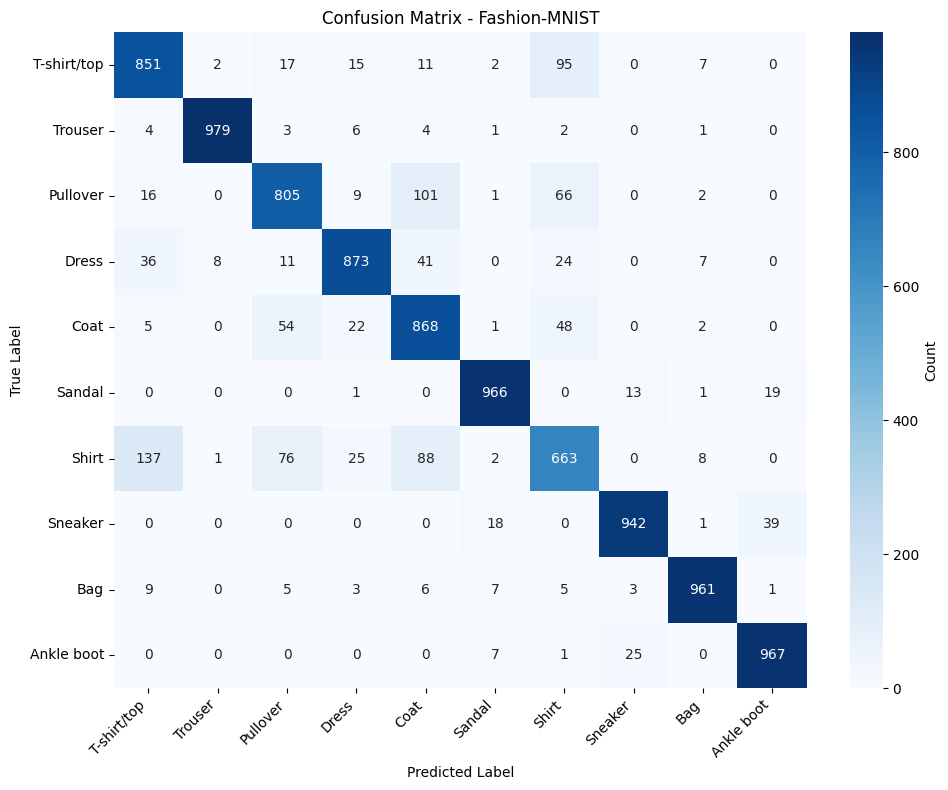

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Fashion-MNIST')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# NUMBER OF HIDDEN LAYERS & NEURONS
# Single hidden layer with 100 neurons (default)
mlp = MLPClassifier(hidden_layer_sizes=(100,))

# Two hidden layers with 128 and 64 neurons
mlp = MLPClassifier(hidden_layer_sizes=(128, 64))

mlp = MLPClassifier(hidden_layer_sizes=(256, 128, 64))

mlp = MLPClassifier(hidden_layer_sizes=(50,))


# ACTIVATION FUNCTIONS
mlp = MLPClassifier(activation='relu') # Relu (default)

mlp = MLPClassifier(activation='logistic') # Logistic/sigmoid

mlp = MLPClassifier(activation='tanh') # Hyperbolic tan

mlp = MLPClassifier(activation='identity') # Identity (linear)


# OPTIMIZATION METHOD & LEARNING RATE
# Adam optimizer (default) with custom learning rate
mlp = MLPClassifier(solver='adam', learning_rate_init=0.001) # default learning_rate_init=0.001
# The initial learning rate used. It controls the step-size in updating the weights. Only used when solver=’sgd’ or ‘adam’.

mlp = MLPClassifier(solver='sgd', learning_rate_init=0.01) # Stochastic Gradient Descent

mlp = MLPClassifier(solver='lbfgs') # L-BFGS (for small datasets)

mlp = MLPClassifier(solver='sgd', learning_rate='adaptive') # Adaptive learning rate with SGD


# REGULARIZATION OR EARLY STOPPING SETTINGS
# L2 regularization (alpha parameter, default=0.0001)
mlp = MLPClassifier(alpha=0.01)  # Stronger regularization
mlp = MLPClassifier(alpha=0.0001)  # Default

# Early stopping
mlp = MLPClassifier(early_stopping=True, validation_fraction=0.1) # validation_fraction=0.1
# validation_faction=0.1 90% used for actual training (updating weights)
# 10% used as a validation set (monitoring performance, deciding when to stop)

mlp = MLPClassifier(early_stopping=True, n_iter_no_change=10, max_iter=200) # early_stopping=False is default
# when early_stopping=True, n_iter_no_change=10, max_iter=200 are default


# Examples with everything put into a model
mlp1 = MLPClassifier(
    hidden_layer_sizes=(256, 128, 64),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    alpha=0.01,
    early_stopping=True,
    max_iter=500,
    random_state=1
)

mlp2 = MLPClassifier(
    hidden_layer_sizes=(50,),
    activation='tanh',
    solver='sgd',
    learning_rate_init=0.01,
    learning_rate='adaptive',
    max_iter=500,
    random_state=1
)

mlp3 = MLPClassifier(
    hidden_layer_sizes=(200, 200),
    activation='relu',
    solver='adam',
    alpha=0.1,
    early_stopping=True,
    validation_fraction=0.2,
    max_iter=500,
    random_state=1
)

# 3. Fashion-MNIST image classification  using pytorch

In [1]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
import torch
from torch.utils.data import TensorDataset, DataLoader

# Load Fashion-MNIST
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# scale to [0,1], add channel dimension -> (N, 1, 28, 28)
X_train = (X_train.astype("float32") / 255.0)[:, None, :, :]
X_test  = (X_test.astype("float32")  / 255.0)[:,  None, :, :]

y_train = y_train.astype(np.int64)
y_test  = y_test.astype(np.int64)

# train/val split: last 10k of train as validation
X_tr, X_val = X_train[:50000], X_train[50000:]
y_tr, y_val = y_train[:50000], y_train[50000:]

# wrap in PyTorch TensorDatasets and DataLoaders
train_ds = TensorDataset(torch.from_numpy(X_tr),  torch.from_numpy(y_tr))
val_ds   = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val))
test_ds  = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))

train_loader = DataLoader(train_ds, batch_size=128, shuffle=True)
val_loader   = DataLoader(val_ds,   batch_size=256, shuffle=False)
test_loader  = DataLoader(test_ds,  batch_size=256, shuffle=False)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
import torch.nn as nn
import torch.optim as optim

# In colab, you should ``change runtime type'' to GPU.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# your code here

Using device: cuda


In [5]:
# Simple Model

# Define Model Architecture
class SimpleFashionMLP(nn.Module):
    """
    Simple Multi-Layer Perceptron (fully-connected neural network)

    Architecture:
    - Input: 784 pixels (28x28 flattened)
    - Hidden Layer 1: 256 neurons with ReLU
    - Hidden Layer 2: 128 neurons with ReLU
    - Hidden Layer 3: 64 neurons with ReLU
    - Output: 10 classes (clothing types)
    """
    def __init__(self):
        super(SimpleFashionMLP, self).__init__()

        # Flatten layer: converts (batch, 1, 28, 28) -> (batch, 784)
        self.flatten = nn.Flatten()

        # HIDDEN LAYER 1: 784 inputs -> 256 neurons
        self.fc1 = nn.Linear(784, 256)
        self.relu1 = nn.ReLU()

        # HIDDEN LAYER 2: 256 -> 128 neurons
        self.fc2 = nn.Linear(256, 128)
        self.relu2 = nn.ReLU()

        # HIDDEN LAYER 3: 128 -> 64 neurons
        self.fc3 = nn.Linear(128, 64)
        self.relu3 = nn.ReLU()

        # OUTPUT LAYER: 64 -> 10 classes
        self.fc4 = nn.Linear(64, 10)
        # Note: No activation here - CrossEntropyLoss handles softmax internally

    def forward(self, x):
        """
        Forward pass: defines how data flows through the network

        Args:
            x: input images, shape (batch_size, 1, 28, 28)

        Returns:
            logits: raw scores for 10 classes, shape (batch_size, 10)
        """
        x = self.flatten(x)      # (batch, 1, 28, 28) -> (batch, 784)

        x = self.fc1(x)          # Apply first layer: (batch, 784) -> (batch, 256)
        x = self.relu1(x)        # Apply ReLU activation

        x = self.fc2(x)          # Second layer: (batch, 256) -> (batch, 128)
        x = self.relu2(x)        # ReLU activation

        x = self.fc3(x)          # Third layer: (batch, 128) -> (batch, 64)
        x = self.relu3(x)        # ReLU activation

        x = self.fc4(x)          # Output layer: (batch, 64) -> (batch, 10)

        return x



# Initialize Model, Loss, and Optimizer
model = SimpleFashionMLP()
model.to(device)  # Move model to GPU/CPU

print("Model Architecture:")
print(model)
print(f"\nTotal parameters: {sum(p.numel() for p in model.parameters()):,}")
print()

criterion = nn.CrossEntropyLoss()
learning_rate = 0.001
my_momentum = 0.9

optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=my_momentum)


# Training Loop
num_epochs = 15

for epoch in range(num_epochs):
    # Train
    model.train()

    train_loss = 0.0
    train_correct = 0
    train_total = 0

    for batch_idx, (images, labels) in enumerate(train_loader):

        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)

        loss = criterion(outputs, labels)

        # Backward pass / backpropagation
        loss.backward()

        # Update weights using SGD as created above
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)  # Get class with the highest score
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    train_accuracy = 100 * train_correct / train_total
    avg_train_loss = train_loss / len(train_loader)

    # Validation
    model.eval()  # Set model to evaluation mode

    validation_correct = 0
    validation_total = 0

    with torch.no_grad():  # Disable gradient computation
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass only (no backward pass in validation)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            validation_total += labels.size(0)
            validation_correct += (predicted == labels).sum().item()

    validation_accuracy = 100 * validation_correct / validation_total

    print(f"Epoch {epoch+1} | Loss: {avg_train_loss:.4f} | Training Accuracy: {train_accuracy:.2f}% | Validation Accuracy: {validation_accuracy:.2f}%")


Model Architecture:
SimpleFashionMLP(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

Total parameters: 242,762

Epoch 1 | Loss: 2.2538 | Training Accuracy: 25.80% | Validation Accuracy: 44.75%
Epoch 2 | Loss: 1.6664 | Training Accuracy: 47.84% | Validation Accuracy: 58.63%
Epoch 3 | Loss: 1.0114 | Training Accuracy: 63.23% | Validation Accuracy: 69.26%
Epoch 4 | Loss: 0.8179 | Training Accuracy: 70.67% | Validation Accuracy: 73.44%
Epoch 5 | Loss: 0.7175 | Training Accuracy: 74.26% | Validation Accuracy: 75.98%
Epoch 6 | Loss: 0.6559 | Training Accuracy: 76.50% | Validation Accuracy: 77.19%
Epoch 7 | Loss: 0.6129 | Training Accuracy: 78.04% | Validation Accuracy: 78.56%
Epoch 8 | Loss: 0.58

In [ ]:
# PRETRAINED MODEL MODIFIED FOR FASHION-MNIST
import torchvision.models as models

# Load and modify pretrained model (resnet50)
model = models.resnet50(weights='IMAGENET1K_V1')
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)  # 1 channel input
model.fc = nn.Linear(model.fc.in_features, 10)  # 10 classes output
model.to(device)

# Setup training
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(15):
    # Training on training set (train_loader)
    model.train()
    train_correct = 0
    train_total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    train_accuracy = 100 * train_correct / train_total

    # Evaluation on validation set (val_loader)
    model.eval()
    validation_correct = 0
    validation_total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            validation_total += labels.size(0)
            validation_correct += (predicted == labels).sum().item()

    validation_accuracy = 100 * validation_correct / validation_total

    print(f"Epoch {epoch+1} | Loss: {avg_train_loss:.4f} | Training Accurary = {train_accuracy:.2f}% | Validation Accuracy = {validation_accuracy:.2f}%")

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 103MB/s]


Training on train set (50k), evaluating on validation set (10k)
Test set (10k) remains untouched

Epoch 1: Train Acc = 83.57%, Val Acc = 87.80%
Epoch 2: Train Acc = 88.95%, Val Acc = 88.21%
Epoch 3: Train Acc = 90.33%, Val Acc = 89.66%
Epoch 4: Train Acc = 91.34%, Val Acc = 90.06%
Epoch 5: Train Acc = 92.23%, Val Acc = 90.01%
Epoch 6: Train Acc = 92.89%, Val Acc = 90.85%
Epoch 7: Train Acc = 93.28%, Val Acc = 90.82%
Epoch 8: Train Acc = 93.83%, Val Acc = 90.86%
Epoch 9: Train Acc = 94.52%, Val Acc = 90.87%
Epoch 10: Train Acc = 94.86%, Val Acc = 91.25%
